<a href="https://colab.research.google.com/github/RudriGowda/Machine-learning-Projects/blob/main/GOLD_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RUDRI GOWDA K.R  ->PROJECT-2-GOLD PRICE PREDICTION


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving gld_price_data.csv to gld_price_data.csv


In [ ]:
df=pd.read_csv('gld_price_data.csv')

In [ ]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Text(0.5, 1.05, 'Correlation of df Features')

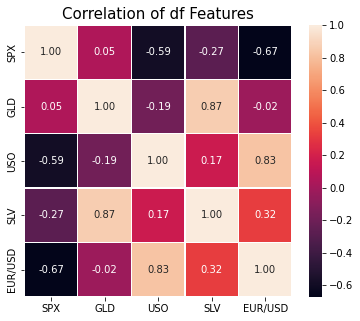

In [ ]:
corr = df.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of df Features', y = 1.05, size=15)

In [ ]:
#Lets look the correlation score
print (corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: %f 0.33413834726925085
Kurtosis: -0.275081


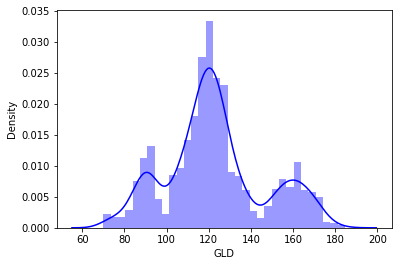

In [ ]:
#Lets Check our target variable
sns.distplot(df['GLD'], color = 'blue')
print('Skewness: %f', df['GLD'].skew())
print("Kurtosis: %f" % df['GLD'].kurt())

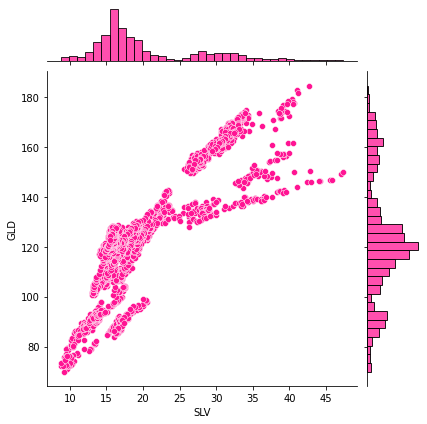

In [ ]:
#Now we check the relation with GLD variable
sns.jointplot(x =df['SLV'], y = df['GLD'], color = 'deeppink')

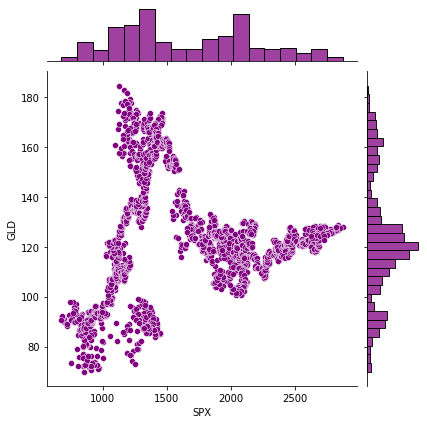

In [ ]:
#Now we check the relation with GLD variable
sns.jointplot(x =df['SPX'], y = df['GLD'], color = 'purple')

In [ ]:
#Now Lets create a ml model
# Now lets take our matrix of feature and target
x_trail = df[['SPX','USO','SLV','EUR/USD']]
x = x_trail.iloc[:, :].values
y = df.iloc[:, 2].values

In [ ]:
#Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#Now fitting the Random forest regression to the traning set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#Now predicting the test set result
y_pred = regressor.predict(x_test)

In [ ]:
#Now Check the error for regression
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   1.3006268049999998
MSE :   5.228816515789273
RMAE :   2.2866605598097136


In [ ]:
#Now Lets Check the Training and Test set Accuracy
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9984081992784245
0.9898360912117761


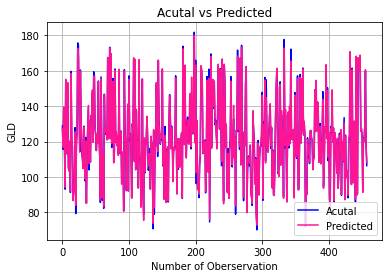

In [ ]:
#Visualising the Accuracy of Predicted result
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(y_pred, color = 'deeppink', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()